# Package import

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
pd.options.display.max_columns = 66

# Data import

## Data Dictionary

| Variable | Definition | Key |
| -------- | ---------- | --- |
| survival | Survival   | 0 = No<br />1 = Yes |
| pclass | Ticket class | 1 = 1st<br />2 = 2nd<br />3 = 3rd |
| sex | Sex | 
| Age | Age in years |
| sibsp | # of siblings / spouses<br />aboard the Titanic | 
| parch | # of parents / children<br />aboard the Titanic | 
| ticket | Ticket number |
| fare | Passenger fare |
| cabin | Cabin number |
| embarked | Port of Embarkation | C = Cherbourg<br />Q = Queenstown<br />S = Southampton |


## Variable Notes

`pclass`: A proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

`age`: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

`sibsp`: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore `parch=0` for them.


In [3]:
data = pd.read_csv('./data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test = pd.read_csv('./data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Munging with Patrick

In [6]:
data['Gender'] = data['Sex'].map({'male' : 0, 'female' : 1})

In [7]:
import re

In [8]:
data['Title'] = data['Name'].map(lambda name: re.search(' [a-zA-Z]+\.', name).group(0)[1:])

In [9]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Lady.          1
Mme.           1
Jonkheer.      1
Capt.          1
Don.           1
Countess.      1
Sir.           1
Ms.            1
Name: Title, dtype: int64

All of the reverends died.

In [10]:
data.loc[data.Title=='Rev.']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Title
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,0,Rev.
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,0,Rev.
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,0,Rev.
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,0,Rev.
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,0,Rev.
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,0,Rev.


In [11]:
def classify_title(title):
    if title in ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rev.', 'Dr.']:
        return title
    elif title == 'Mme.':
        return 'Mrs.'
    elif title in ['Mlle', 'Ms.']:
        return 'Miss.'
    else:
        return 'Rare'

In [12]:
data['Title'] = data['Title'].map(classify_title)

In [13]:
data['Title'].value_counts()

Mr.        517
Miss.      183
Mrs.       126
Master.     40
Rare        12
Dr.          7
Rev.         6
Name: Title, dtype: int64

In [14]:
title_df = pd.get_dummies(data['Title'])

In [15]:
data = pd.concat((data, title_df), axis=1)

In [16]:
data.pivot_table(values='Survived', columns=['Pclass'], index='Title')

Pclass,1,2,3
Title,,,
Dr.,0.600000,0.000000,NaN
Master.,1.000000,1.000000,0.392857
Miss.,0.956522,0.942857,0.500000
Mr.,0.345794,0.087912,0.112853
Mrs.,0.976744,0.902439,0.500000
Rare,0.583333,NaN,NaN
Rev.,NaN,0.000000,NaN


In [18]:
age_by_title = data.groupby('Title')['Age']
median_ages = age_by_title.median()
missing_ages = data[data['Age'].isnull()]['Title'].map(median_ages)
data['Age'].fillna(missing_ages, inplace=True)

Note that because of title collision, `Miss.` is bimodal:

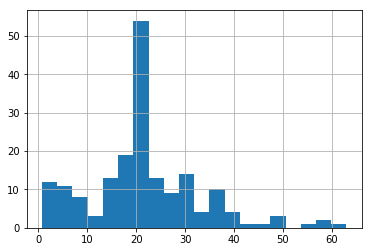

In [19]:
age_by_title.get_group('Miss.').hist(bins=20)

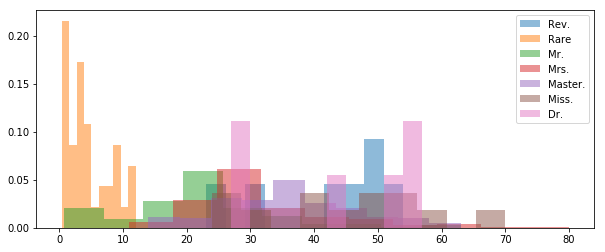

In [20]:
plt.figure(figsize=(10, 4))
age_by_title.hist(bins=10, grid=False, normed=True, histtype='bar', stacked=True, alpha=.5)
plt.legend(age_by_title.indices)

In [21]:
data['Pclass'] = data['Pclass'].astype('category', ordered=True)

In [22]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()

In [23]:
age = data['Age']
age = age.apply(lambda x: (x - age_mean)/age_std)

In [24]:
data['Age'] = age

In [25]:
fare = data['Fare']
fare = fare.apply(lambda x: x if x>0 else .01)

logFare = np.log(fare)
logFare_mean = logFare.mean()
logFare_std = logFare.std()
logFareNmz = (logFare - logFare_mean)/logFare_std

In [26]:
data['logFare'] = logFareNmz

In [27]:
train_df = pd.concat((data[['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'logFare']], title_df), axis=1)

In [28]:
train_df.max(axis=0)

Pclass     3.000000
Gender     1.000000
Age        3.815196
SibSp      8.000000
Parch      6.000000
logFare    2.546545
Dr.        1.000000
Master.    1.000000
Miss.      1.000000
Mr.        1.000000
Mrs.       1.000000
Rare       1.000000
Rev.       1.000000
dtype: float64

In [29]:
x_train = train_df.values

In [30]:
y_train = data['Survived'].ravel()

## Random forest

In [31]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [32]:
xtclf = ExtraTreesClassifier()
gbclf = GradientBoostingClassifier(warm_start=True)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.25)

In [35]:
xtclf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
xtclf.score(x_val, y_val)

0.78923766816143492

In [49]:
gbclf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=True)

In [50]:
gbclf.score(x_val, y_val)

0.82959641255605376

## Next Steps

Goal: Inject all this into a python script so that we can also fit the test data and then submit the results to Kaggle!

# Data munging from Internet

In [5]:
from scipy.stats import mode
import string

In [15]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    print(big_string)
    return np.nan

In [17]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [183]:
def phase1clean(df):
    #setting silly values to nan
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    
    #Special case for cabins as nan may be signal
    df.Cabin = df.Cabin.fillna('Unknown').astype('category')

    #creating a title column from name
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']

    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    
    df['Title']=df.apply(replace_titles, axis=1).astype('category')

    #Turning cabin number into Deck
    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list)).astype('category')
        
    #Creating new family_size column
    df['Family_Size']=df['SibSp']+df['Parch']
    
    return df

In [184]:
def phase2clean(train, test):
    #data type dictionary
    data_type_dict={'Pclass':'ordinal', 'Sex':'nominal', 
                    'Age':'numeric', 
                    'Fare':'numeric', 'Embarked':'nominal', 'Title':'nominal',
                    'Deck':'nominal', 'Family_Size':'ordinal'}      

    #imputing nan values
    for df in [train, test]:
        classmeans = df.pivot_table('Fare', index='Pclass', aggfunc='mean')
        df.Fare = df[['Fare', 'Pclass']].apply(lambda x: classmeans.loc[x['Pclass']] 
                                               if pd.isnull(x['Fare']) else x['Fare'], axis=1)
        meanAge=np.mean(df.Age)
        df.Age=df.Age.fillna(meanAge)
        modeEmbarked = df.Embarked.mode()[0]
        df.Embarked = df.Embarked.fillna(modeEmbarked)


#    Fare per person
    for df in [train, test]:
        df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    
    #Age times class
    for df in [train, test]:
        df['Age*Class']=df['Age']*df['Pclass']
    
    data_type_dict['Fare_Per_Person']='numeric'
    data_type_dict['Age*Class']='numeric'
    
    return [train,test, data_type_dict]

In [185]:
def discretise_numeric(train, test, data_type_dict, no_bins=10):
    N=len(train)
    M=len(test)
    test=test.rename(lambda x: x+N)
    joint_df=train.append(test)
    for column in data_type_dict:
        if data_type_dict[column]=='numeric':
            joint_df[column]=pd.qcut(joint_df[column], 
                                     no_bins, duplicates='drop')
    train=joint_df.loc[range(N)]
    test=joint_df.loc[range(N,N+M)]
    return train, test, data_type_dict

In [186]:
def clean(no_bins=0):
    trainpath = './data/train.csv'
    testpath = './data/test.csv'
    traindf = pd.read_csv(trainpath)
    testdf = pd.read_csv(testpath)

    traindf=phase1clean(traindf)
    testdf=phase1clean(testdf)
    
    traindf, testdf, data_type_dict=phase2clean(traindf, testdf)
    traindf, testdf, data_type_dict=discretise_numeric(traindf, testdf, data_type_dict)

    
    #create a submission file for kaggle
    predictiondf = pd.DataFrame(testdf['PassengerId'])
    predictiondf['Survived']=[0 for x in range(len(testdf))]
    predictiondf.to_csv('./data/prediction.csv', index=False)
    return [traindf, testdf, data_type_dict]

In [187]:
train, test, dtype_dict = clean(no_bins=10)

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
Age                891 non-null category
Age*Class          891 non-null category
Cabin              891 non-null object
Deck               891 non-null object
Embarked           891 non-null object
Family_Size        891 non-null int64
Fare               891 non-null category
Fare_Per_Person    891 non-null category
Name               891 non-null object
Parch              891 non-null int64
PassengerId        891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null object
SibSp              891 non-null int64
Survived           891 non-null float64
Ticket             891 non-null object
Title              891 non-null category
dtypes: category(5), float64(1), int64(5), object(6)
memory usage: 135.6+ KB


In [194]:
object_columns = ['Cabin', 'Deck', 'Embarked', 'Sex']
for object_column in object_columns:
    train[object_column] = train[object_column].astype('category')
    test[object_column] = test[object_column].astype('category')

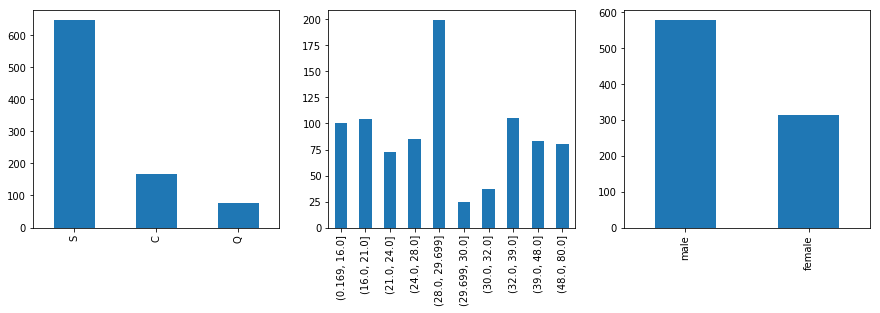

In [196]:
plt.subplots(1,3,figsize=(15,4))
plt.subplot(131)
train.Embarked.value_counts().plot(kind='bar');
plt.subplot(132)
train.Age.value_counts(sort=False).plot(kind='bar');
plt.subplot(133)
train.Sex.value_counts().plot(kind='bar');

In [164]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [165]:
xtclf = ExtraTreesClassifier()